In [1]:
import pandas as pd
import numpy as np


In [2]:
#read the excel
df = pd.read_csv('../data/raw/first_clean.csv')

In [3]:
df.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000


NOW WE CONCENTRATE ON SPLITTING NUMERICAL AND CATEGORICAL DATA



In [4]:
#pick 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_lot', 'floors',sqft_lot15,'sqft_living15', price as numerical variables

numericals = df[['bedrooms', 'bathrooms', 'sqft_above', 'floors','sqft_lot15','sqft_living15', 'sqft_basement']]
numericals.head()

,bedrooms,bathrooms,sqft_above,floors,sqft_lot15,sqft_living15,sqft_basement
0,3,1.00,1180,1.0,5650,1340,0
1,3,2.25,2170,2.0,7639,1690,400
2,2,1.00,770,1.0,8062,2720,0
3,4,3.00,1050,1.0,5000,1360,910
4,3,2.00,1680,1.0,7503,1800,0


In [5]:
#pick 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated' as categorical variables

categoricals = df[['waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated']]

In [6]:
target = df['price']  

## Working on numericals

For numerical data, we will: <br>
i. check and correct skewness and outliers <br>
ii. check multicollinearity <br>

Rule of thumb :
If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.
If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.
If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.


In [7]:
#check the distribution of the numerical variables
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
numericals.columns

Index(['bedrooms', 'bathrooms', 'sqft_above', 'floors', 'sqft_lot15',
       'sqft_living15', 'sqft_basement'],
      dtype='object')

In [9]:
numericals.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,21597.0,3.373200,0.926299,1.0,3.00,3.00,4.0,33.0
bathrooms,21597.0,2.115826,0.768984,0.5,1.75,2.25,2.5,8.0
sqft_above,21597.0,1788.596842,827.759761,370.0,1190.00,1560.00,2210.0,9410.0
floors,21597.0,1.494096,0.539683,1.0,1.00,1.50,2.0,3.5
sqft_lot15,21597.0,12758.283512,27274.441950,651.0,5100.00,7620.00,10083.0,871200.0
sqft_living15,21597.0,1986.620318,685.230472,399.0,1490.00,1840.00,2360.0,6210.0
sqft_basement,21597.0,291.725008,442.667800,0.0,0.00,0.00,560.0,4820.0


In [10]:
#check min max
numericals.describe().T[['min','max']]

,min,max
bedrooms,1.0,33.0
bathrooms,0.5,8.0
sqft_above,370.0,9410.0
floors,1.0,3.5
sqft_lot15,651.0,871200.0
sqft_living15,399.0,6210.0
sqft_basement,0.0,4820.0


we havbe a wide range and that can mess up our linear model, so as a result, we need to transform to a similar range

In [11]:
def plot(df, column_name):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.boxplot(df[column_name], ax=ax[0])
    sns.histplot(df, x=column_name, bins=50, ax=ax[1])
    plt.show()


for skewness

In [12]:
#define function to check skewness
def check_skewness(df, column_name):
    return df[column_name].skew()

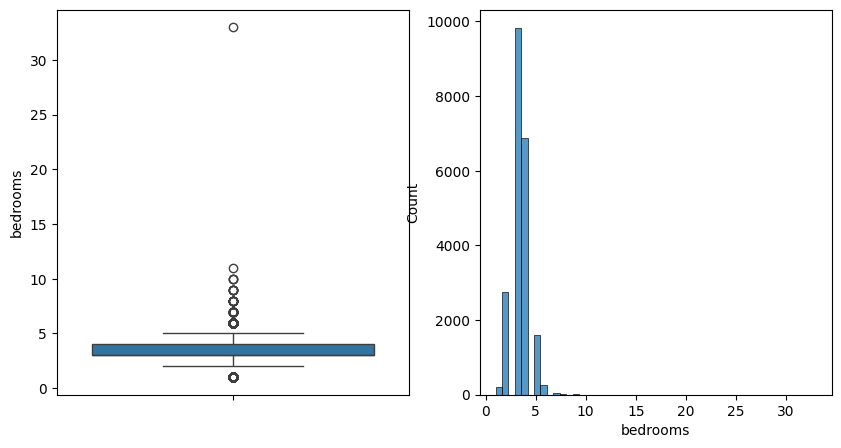

In [13]:
plot(numericals, 'bedrooms')

In [14]:
#check skewness
check_skewness(numericals, 'bedrooms')

2.023641235344595

the skewness score for bathrooms is 2.02364, suggesting that it is a heavily skewed distribution.So we will address the skewness. There is one outlier from the boxplot. we will decide later whether to drop them depending on the other values.

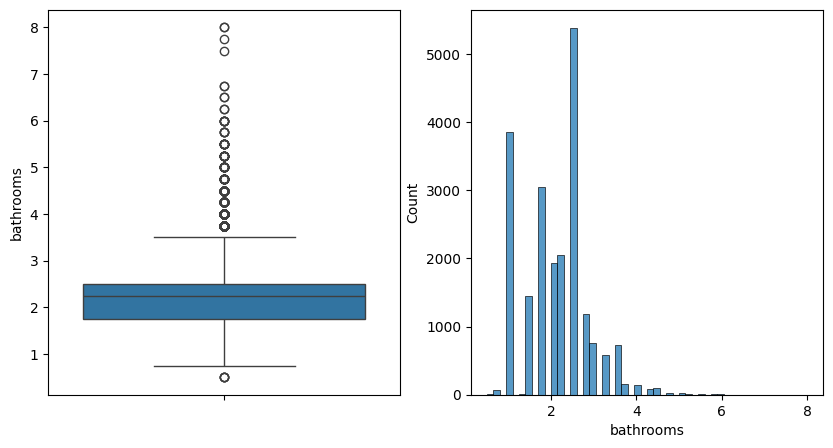

0.5197092816403838

In [15]:
plot(numericals, 'bathrooms')

check_skewness(numericals, 'bathrooms')

skewness score is low , showing it´s fairly symetrical, with a little to the right, 
so we will focus on the outliers

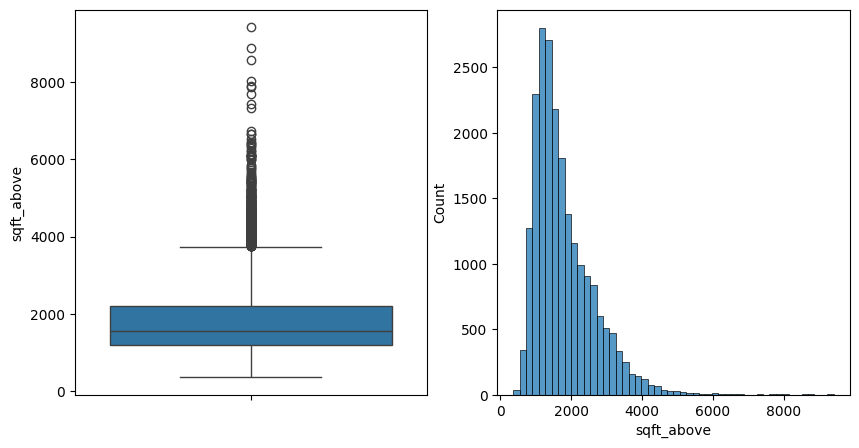

1.4474342353857224

In [16]:
#sqft_above
plot(numericals, 'sqft_above')
check_skewness(numericals, 'sqft_above')

the skewness score is 1.4474 , the distribution is also heavily skewed. We also address the outliers

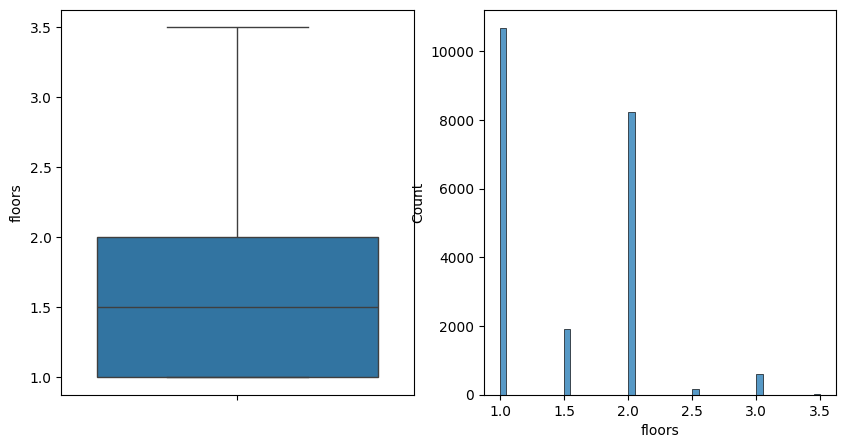

0.6144969756263127

In [17]:
#floors
plot(numericals, 'floors')
check_skewness(numericals, 'floors')

No visible outliers and slightly skewed distribution. The distribution is less. Technically this could be considered a categorical data, but we will retain it as numericals

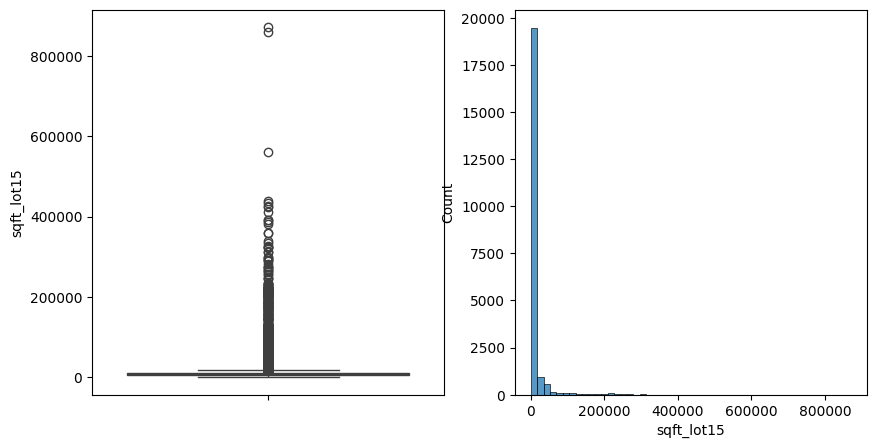

9.524361965117942

In [18]:
#sqft_lot15
plot(numericals, 'sqft_lot15')
check_skewness(numericals, 'sqft_lot15')


extremely skewed, lots of outliers. we will work on both

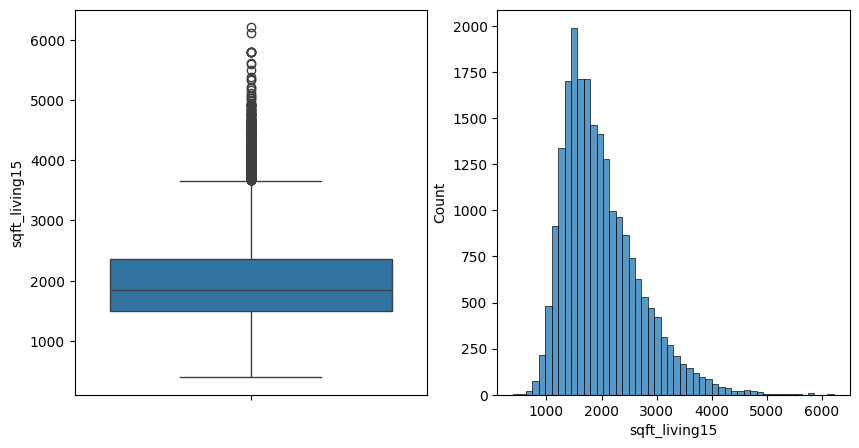

1.1068753971161713

In [19]:
#sqft_living15
plot(numericals, 'sqft_living15')
check_skewness(numericals, 'sqft_living15')

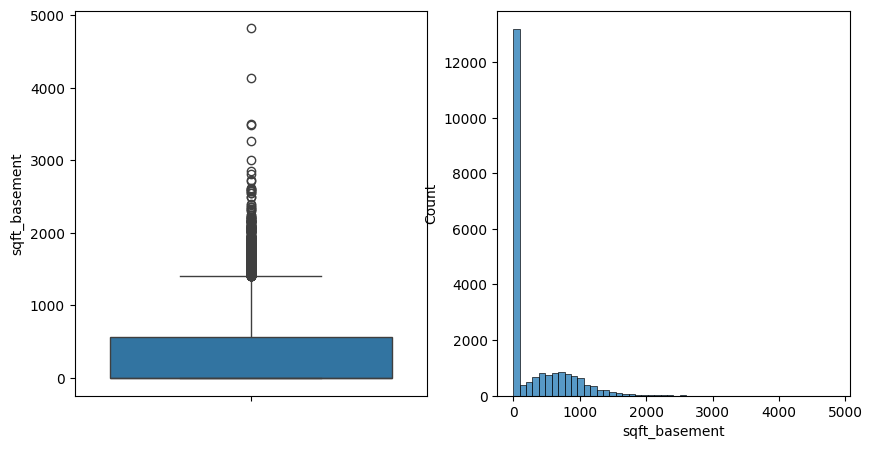

1.5768896267534047

In [20]:
#sqft_basement
plot(numericals, 'sqft_basement')
check_skewness(numericals, 'sqft_basement')

presence of outliers and a excessively skewed . so we will correct both

## correcting skewness and outliers

In [21]:

#we will obtain the lists of numerical columns to correct the skewness
skewlist = ['bedrooms', 'bathrooms', 'sqft_above', 'floors','sqft_lot15','sqft_living15', 'sqft_basement']

#list to drop outliers
outlier_list = ['bedrooms', 'bathrooms', 'sqft_above', 'sqft_lot15','sqft_living15', 'sqft_basement']

we are going to take two approaches, 
1. drop outliers first before correcting skewness
2. only correct outliers

In [22]:
numericals2 = numericals.copy()

In [23]:
numericals3 = numericals.copy()

In [24]:
def remove_outliers(data, list):
    '''
    This function takes a dataframe and a list of columns and returns a dataframe without outliers

    Parameters:
    data: dataframe
    list: list of columns

    returns:
    new dataframe without outliers
    '''
    for column in list:
        iqr = np.percentile(data[column],75) - np.percentile(data[column],25)
        upper_whisker = np.percentile(data[column],75) + 1.5*iqr
        lower_whisker = np.percentile(data[column],25) - 1.5*iqr
        data = data[(data[column]<upper_whisker) & (data[column]>lower_whisker)]
    return data

remove outlier and then check skewness

In [25]:
numericals_out = remove_outliers(numericals2, outlier_list)
numericals_out.shape

(17607, 7)

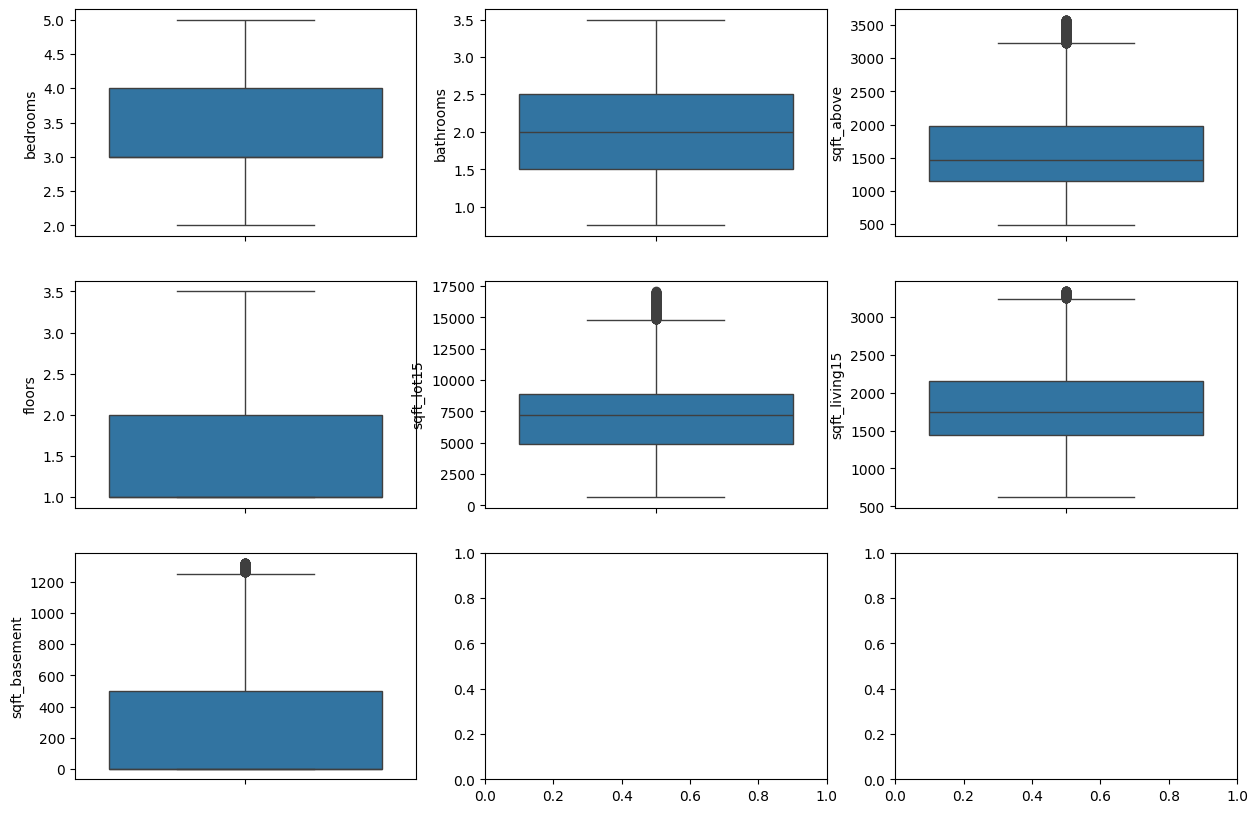

In [26]:
#get boxplot for all the numerical variables, in a grid of 2 rows and 3 columns
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for variable, subplot in zip(numericals_out, ax.flatten()):
    sns.boxplot(numericals_out[variable], ax=subplot)


In [27]:
numericals4 = numericals.copy()

In [28]:
def remove_outliers_iqr(data, columns, threshold=1.5):
    """
    Remove outliers from specified columns using the IQR method.

    Parameters:
    - data: DataFrame
        The input DataFrame containing the data.
    - columns: list
        A list of column names where outliers should be removed.
    - threshold: float, optional
        The threshold value for detecting outliers. The default is 1.5, which is a common choice.

    Returns:
    - DataFrame
        A new DataFrame with outliers removed from the specified columns.
    """

    # Create a copy of the input data
    data_cleaned = data.copy()

    for column in columns:
        # Calculate the IQR for the current column
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Remove outliers outside the defined bounds
        data_cleaned = data_cleaned[(data_cleaned[column] >= lower_bound) & (data_cleaned[column] <= upper_bound)]

    return data_cleaned


In [29]:
#assign value to data_cleaned
numerical_out2 = remove_outliers_iqr(numericals4, outlier_list)

In [30]:
#shape
numerical_out2.shape

(18015, 7)

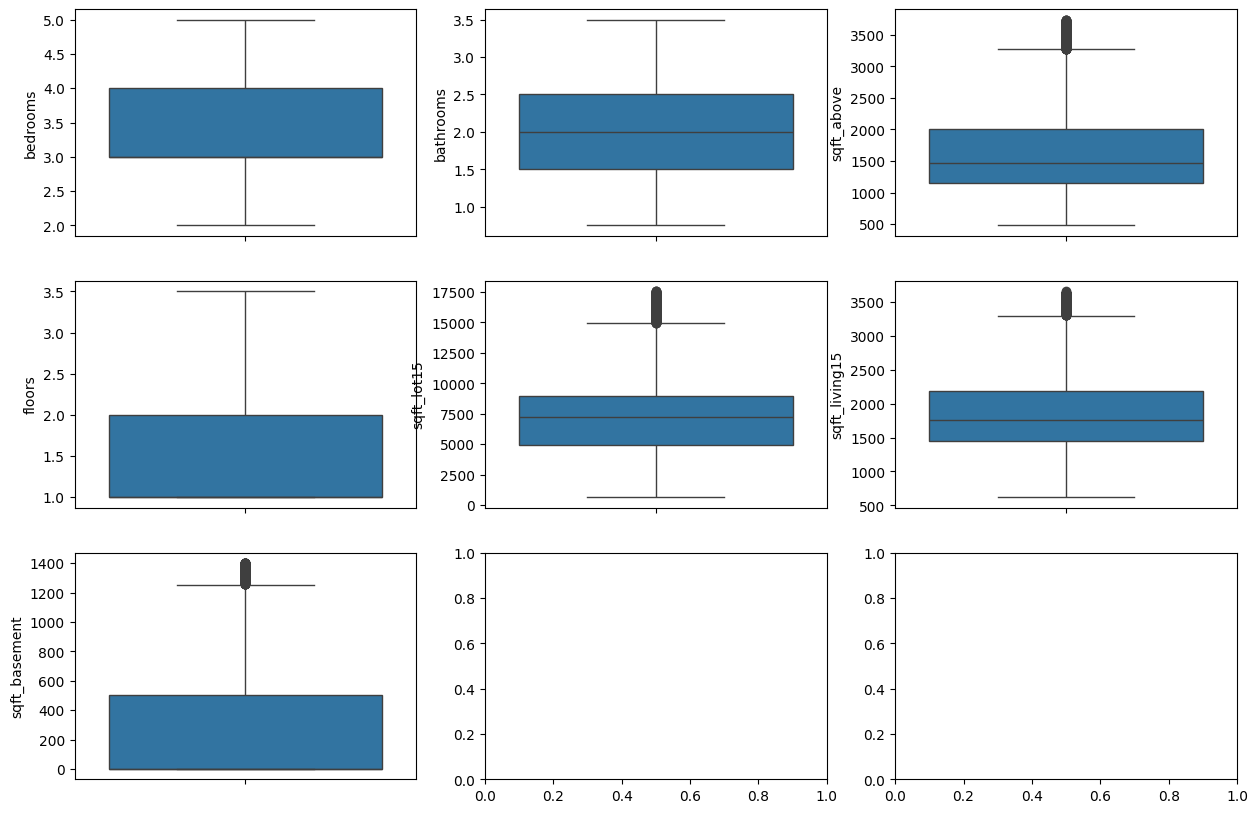

In [31]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for variable, subplot in zip(numerical_out2, ax.flatten()):
    sns.boxplot(numerical_out2[variable], ax=subplot)

In [36]:
#check skewness for all the numerical variables
for column in skewlist:
    print(column, check_skewness(numerical_out2, column))



bedrooms 0.2127493919446453
bathrooms -0.050745441385294965
sqft_above 0.9159361551041457
floors 0.7175236174930838
sqft_lot15 0.4326595271365473
sqft_living15 0.7312830657574286
sqft_basement 1.1975206943798482


Second outlier removal method retained more rows than the second 
And both boxplots retain similar shape  

In [32]:
#save the cleaned data
numerical_out2.to_csv('../data/raw/numerical_no_outlier.csv', index=False)

In [33]:
#save categorical data
categoricals.to_csv('../data/raw/categorical.csv', index=False)

In [34]:
#save target data
target.to_csv('../data/cleaned/target.csv', index=False)

In [35]:
#save numerical data
numericals.to_csv('../data/raw/numerical.csv', index=False)